# 线性回归

1 偏差函数MSE具有良好的碗形，因此最终都会回归到最低点。

2 由于多维数据可能数值范围不同，需要进行归一化

In [42]:
import numpy as np
import matplotlib.pyplot as plt

In [79]:
class LinearRegression:
    def __init__(self, learning_rate = 0.1, method = "normal equation", 
                    derivative_method = "MSE", iteration_times = 100,
                    batch_size = 2):
        '''
        method: normal equation, gradient descent, random gd, batch gd
        '''
        self.method = method
        self.derivative_method = derivative_method
        self.learning_rate = learning_rate
        self.iteration_times = iteration_times
        self.batch_size = batch_size
        self.theta = None
        self.theta_history = None
    def _expand_x(self, x):
        return np.hstack((x, np.ones(x.shape[0]).reshape(x.shape[0], 1)))
    def _gradient_descent_once(self, theta, x, y, instance_num, learning_rate, 
                               derivative_method = "MSE"):
        '''
        一次梯度下降
        '''
        if(derivative_method == "MSE"):
            gradients = 2/instance_num * x.T.dot(x.dot(theta) - y)
            return theta - learning_rate * gradients
        else:
            return None
    def _fit_normal_equation(self, x, y):
        '''
        正规方程闭式解法
        '''
        return np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
    def _fit_gradient_descent(self, x, y, derivative_method, learning_rate,
                             iteration_times):
        '''
        梯度下降法
        '''
        theta = np.zeros(x.shape[1]).reshape(x.shape[1], 1)
        theta_history = []
        for times in range(iteration_times):
            theta = self._gradient_descent_once(theta, x, y, x.shape[0],
                                                learning_rate, 
                                                derivative_method)
            theta_history.append(theta)
        return theta, theta_history
    def _fit_random_gd(self, x, y, derivative_method, learning_rate, 
                      iteration_times):
        '''
        随机梯度下降法
        '''
        theta = np.zeros(x.shape[1]).reshape(x.shape[1], 1)
        theta_history = []
        random_index_list = np.arange(x.shape[0])
        for times in range(iteration_times):
            if(0 == len(random_index_list)):
                break
            index = np.random.choice(random_index_list, size = 1, 
                                        replace = False)
            random_index_list = np.setdiff1d(random_index_list, index)
            theta = self._gradient_descent_once(theta, x[index, :], 
                                                y[index, :], 1,
                                                learning_rate, 
                                                derivative_method)
            theta_history.append(theta)
        return theta, theta_history
    def _fit_batch_gd(self, x, y, derivative_method, learning_rate, 
                      iteration_times, batch_size):
        '''
        小批量随机梯度下降法
        '''
        theta = np.zeros(x.shape[1]).reshape(x.shape[1], 1)
        theta_history = []
        random_index_list = np.arange(x.shape[0])
        for times in range(iteration_times):
            if(0 == len(random_index_list)):
                break
            index_list = np.random.choice(random_index_list, size = batch_size, 
                                         replace = False)
            random_index_list = np.setdiff1d(random_index_list, index_list)
            theta = self._gradient_descent_once(theta, x[index_list, :], 
                                                y[index_list, :], len(index_list), 
                                                learning_rate, 
                                                derivative_method)
            theta_history.append(theta)
        return theta, theta_history
    def fit(self, x, y):
        x = self._expand_x(x)
        self.theta = np.zeros(x.shape[1]).reshape(x.shape[1], 1)
        self.theta_history = []
        if(self.method == 'normal equation'):
            self.theta = self._fit_normal_equation(x, y)
        elif(self.method == 'gradient descent'):
            self.theta, self.theta_history = self._fit_gradient_descent(x, y, 
                                            self.derivative_method, 
                                            self.learning_rate,
                                            self.iteration_times)
        elif(self.method == 'random gd'):
            self.theta, self.theta_history = self._fit_random_gd(x, y, 
                                            self.derivative_method, 
                                            self.learning_rate,
                                            self.iteration_times)
        elif(self.method == 'batch gd'):
            self.theta, self.theta_history = self._fit_batch_gd(x, y, 
                                            self.derivative_method, 
                                            self.learning_rate,
                                            self.iteration_times,
                                            self.batch_size)
        return self
    def predict(self, x):
        return self._expand_x(x).dot(self.theta)
    def plot_history(self, x, color = 'r', linewidth = 2):
        expand_x = self._expand_x(x)
        for theta in self.theta_history:
            y = expand_x.dot(theta)
            plt.plot(x, y, color=color, linewidth=linewidth)            


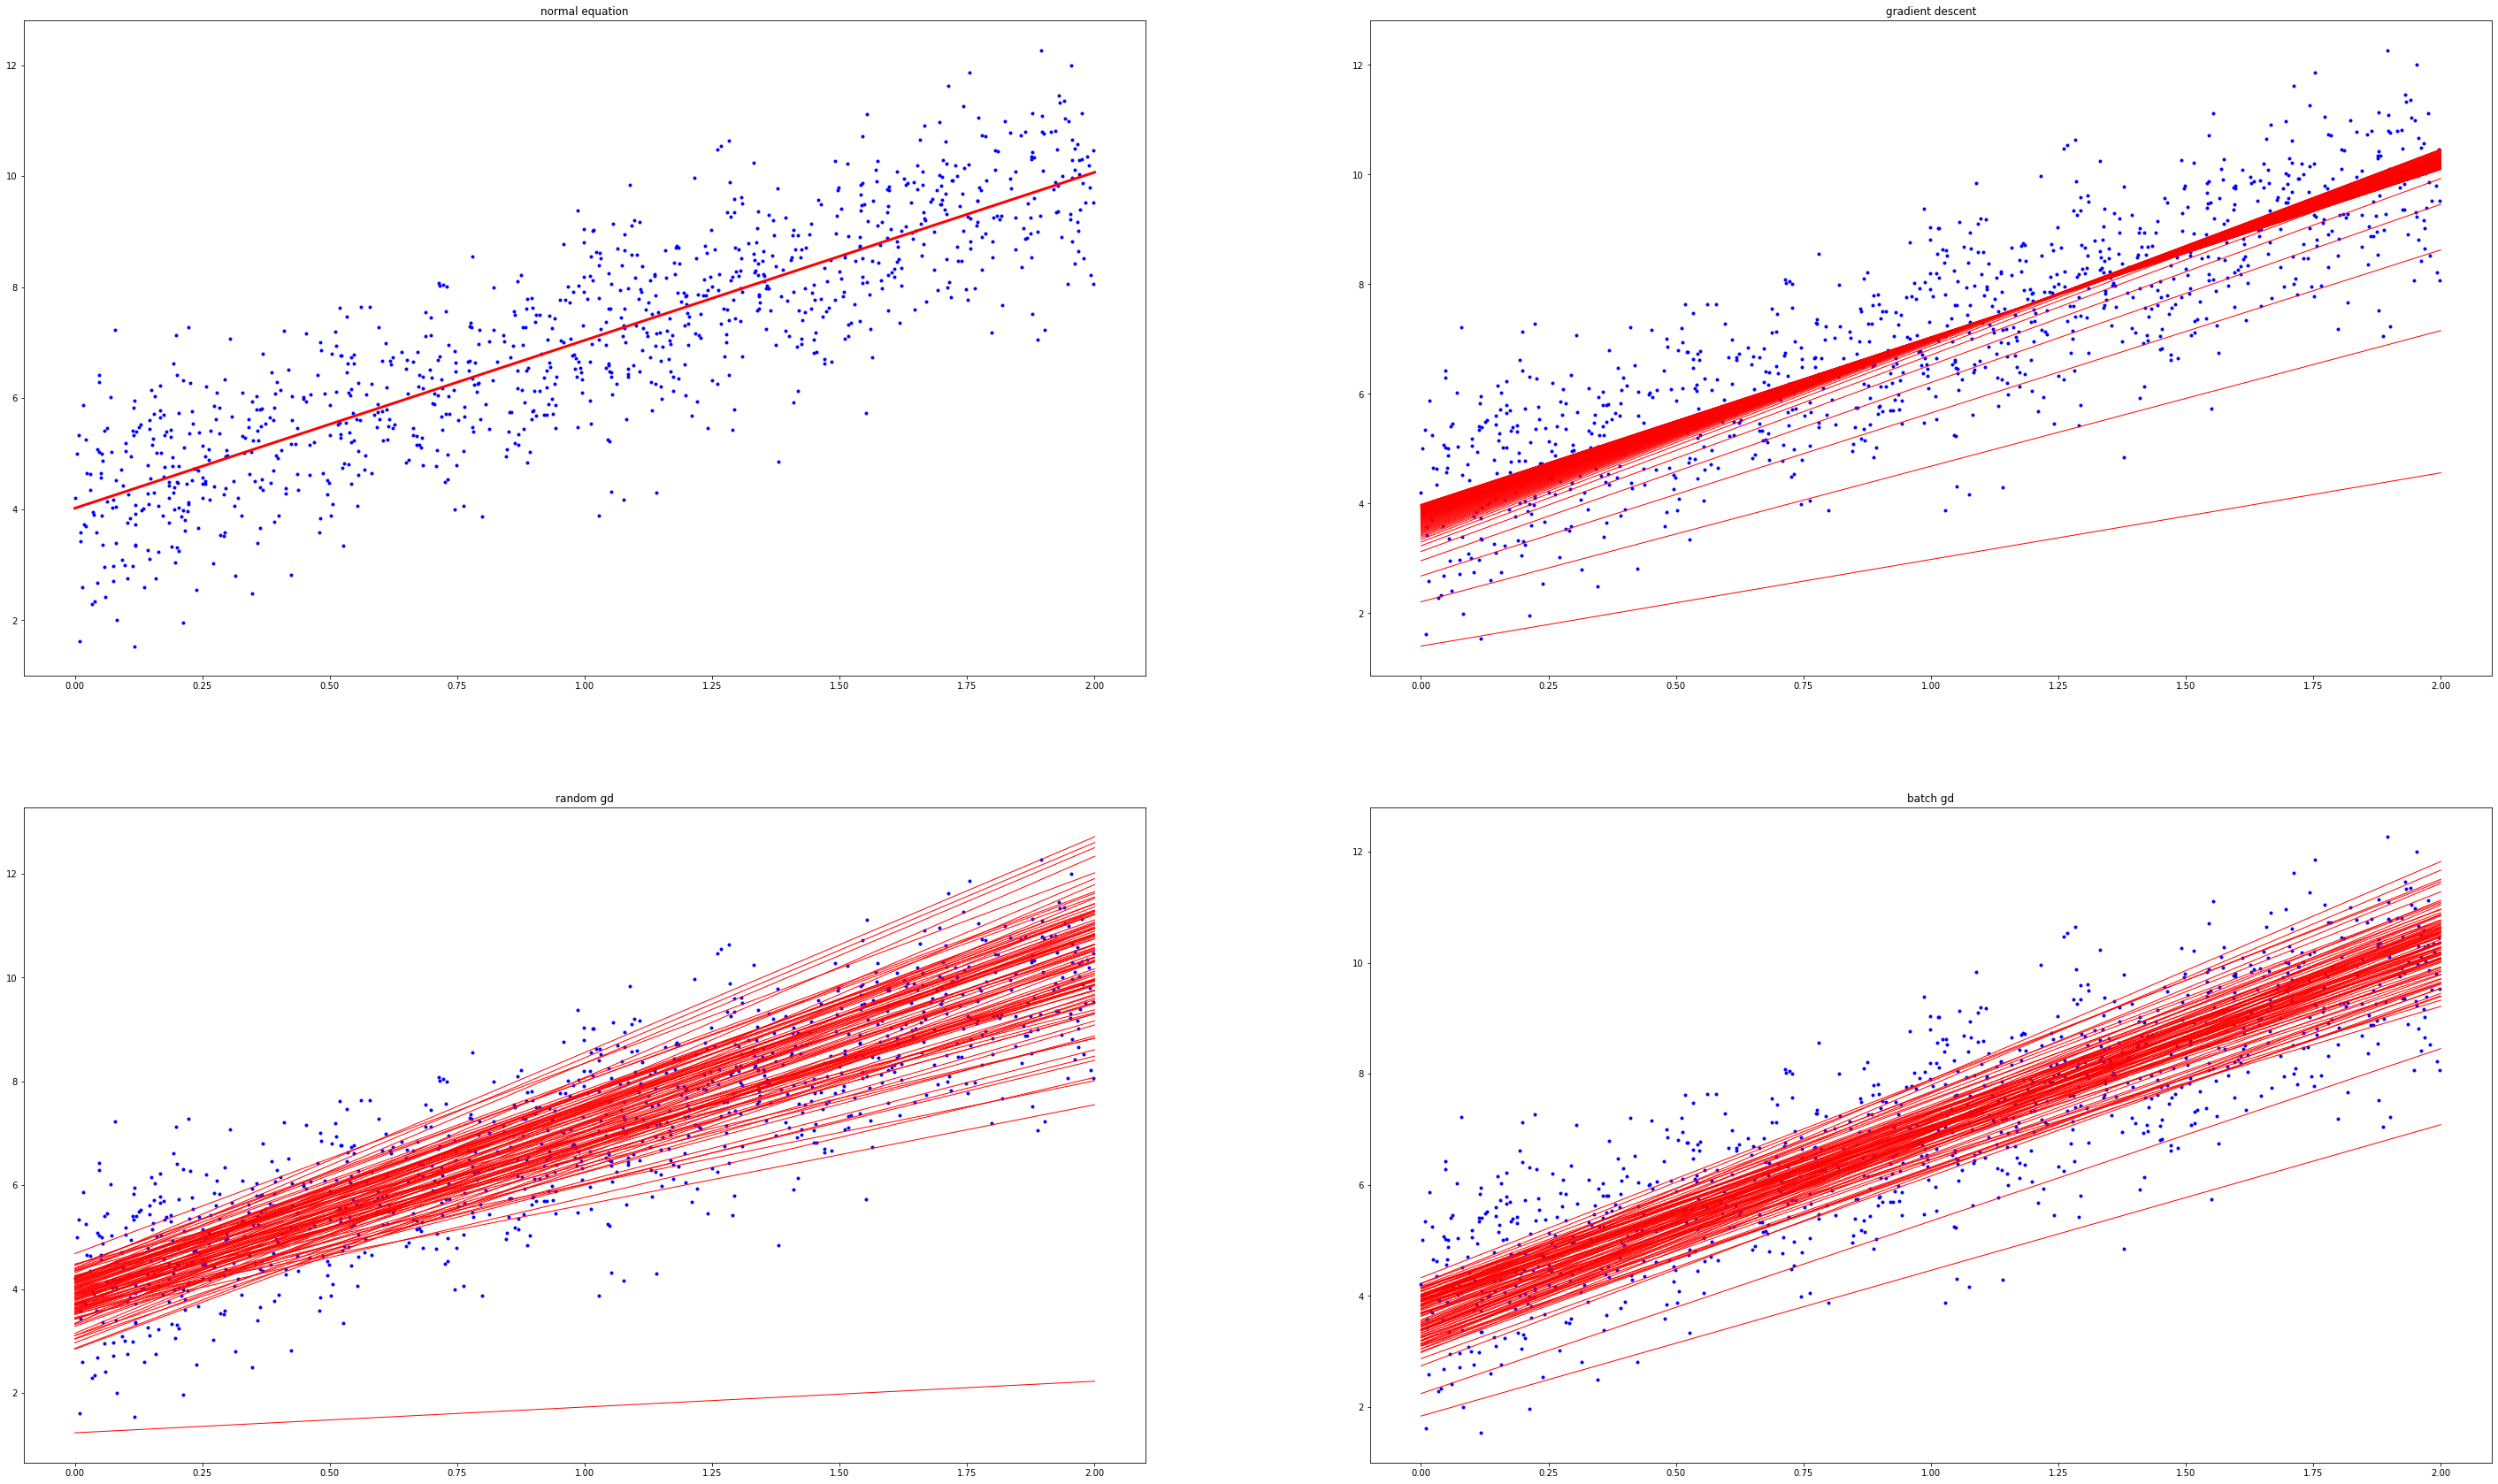

In [86]:

x = 2 * np.random.rand(1000, 1)
y = 4 + 3 *  x + np.random.randn(1000, 1)
x_test = np.array([[0], [2]])
#############
plt.figure("linear regression", figsize = (50, 30))
plt.subplot(221)
linear_clf = LinearRegression()
linear_clf.fit(x, y)
y_test = linear_clf.predict(x_test)
plt.plot(x, y, "b.")
plt.plot(x_test, y_test , 'r-', linewidth = '3')
plt.title('normal equation')
#############
plt.subplot(222)
linear_clf = LinearRegression(method='gradient descent')
linear_clf.fit(x, y)
plt.plot(x, y, "b.")
linear_clf.plot_history(x_test, linewidth = 1)
plt.title('gradient descent')
#############
plt.subplot(223)
linear_clf = LinearRegression(method='random gd')
linear_clf.fit(x, y)
plt.plot(x, y, "b.")
linear_clf.plot_history(x_test, linewidth = 1)
plt.title('random gd' )
#############
plt.subplot(224)
linear_clf = LinearRegression(method='batch gd')
linear_clf.fit(x, y)
plt.plot(x, y, "b.")
linear_clf.plot_history(x_test, linewidth = 1)
plt.title('batch gd' )
plt.show()